In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from pandas.plotting import parallel_coordinates

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


Loading & Understanding the data set

In [2]:
olive_oil = pd.read_csv("olive_oil.csv")
olive_oil

,category,palmitico,palmitoleico,stearico,oleico,linoleico,eicosanoico,linolenico
0,NA,10.750000,0.75,2.26,78.230011,6.720000,0.36,0.60
1,NA,10.880000,0.73,2.24,77.089996,7.810000,0.31,0.61
2,NA,9.109999,0.54,2.46,81.129997,5.490000,0.31,0.63
3,NA,9.660000,0.57,2.40,79.519997,6.190000,0.50,0.78
4,NA,10.510000,0.67,2.59,77.709999,6.720000,0.50,0.80
...,...,...,...,...,...,...,...,...
377,WL,12.800000,1.10,2.90,74.900002,7.900000,0.10,0.10
378,WL,10.600000,1.00,2.70,77.400002,8.100001,0.10,0.10
379,WL,10.100000,0.90,2.10,77.199997,9.700000,0.00,0.00
380,WL,9.899999,1.20,2.50,77.500000,8.700000,0.10,0.10


In [3]:
# Print the number of rows for each sample
olive_oil["category"].value_counts()

category
SA     206
U       51
EL      50
WL      50
NA      25
Name: count, dtype: int64

In [4]:
olive_oil.isnull().sum() # Checking for missing values


category        0
palmitico       0
palmitoleico    0
stearico        0
oleico          0
linoleico       0
eicosanoico     0
linolenico      0
dtype: int64

List of all the features for a sample in the data set
I can obtain all the numeric columns with num_col = df.select_dtypes(include = ['float64', 'int64'])
but for me this is more accurate:

In [5]:
features_columns = [
    "palmitico",
    "palmitoleico",
    "stearico",
    "oleico",
    "linoleico",
    "eicosanoico",
    "linolenico",
]
# Category label column
category_column = "category"

Correlation & Features Relationship 

In [6]:
# Features with a strong correlation with our category
corr = olive_oil.drop("category", axis=1).corr()
good_features_list = corr[abs(corr) > 0.5]
good_features_list

,palmitico,palmitoleico,stearico,oleico,linoleico,eicosanoico,linolenico
palmitico,1.000000,0.863363,NaN,-0.918090,0.751455,NaN,NaN
palmitoleico,0.863363,1.000000,NaN,-0.933960,0.868687,NaN,NaN
stearico,NaN,NaN,1.0,NaN,NaN,NaN,NaN
oleico,-0.918090,-0.933960,NaN,1.000000,-0.940499,NaN,NaN
linoleico,0.751455,0.868687,NaN,-0.940499,1.000000,NaN,NaN
eicosanoico,NaN,NaN,NaN,NaN,NaN,1.000000,0.742196
linolenico,NaN,NaN,NaN,NaN,NaN,0.742196,1.000000


In [7]:
# Calculate the number of bins we need
number_of_bins = 2 * int(
    round(math.sqrt(olive_oil.shape[0]))
)  # Based on the number of rows
number_of_bins

40

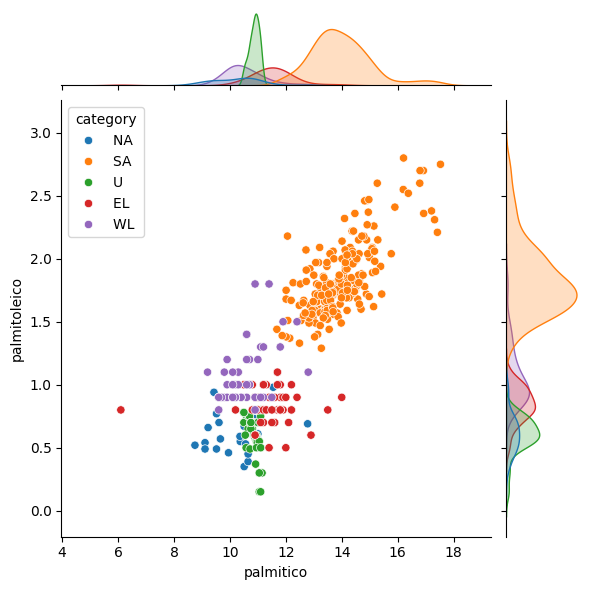

In [8]:
# Scatter histogram 
sns.jointplot(data=olive_oil, x="palmitico", y="palmitoleico", hue="category")
plt.show()

C:\Users\fabio\AppData\Local\Temp\ipykernel_4192\237831573.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\fabio\AppData\Local\Temp\ipykernel_4192\237831573.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\fabio\AppData\Local\Temp\ipykernel_4192\237831573.py:4: UserWar

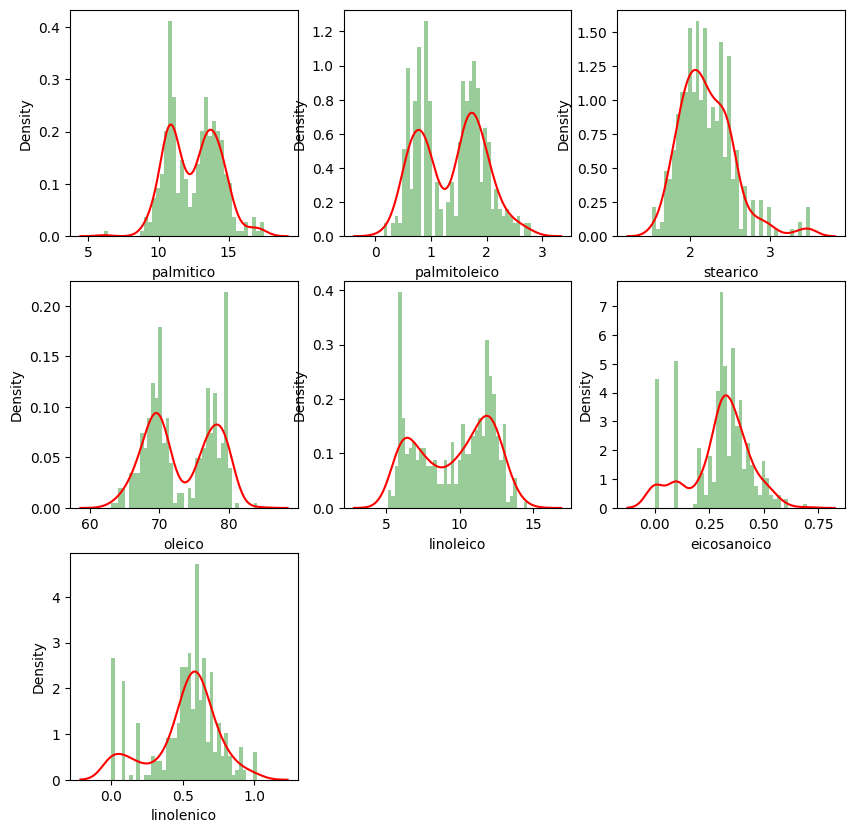

In [9]:
# Histograms 
f, axes = plt.subplots(3, 3, figsize=(10, 10))
for ax, feature in zip(axes.flat, features_columns):
    sns.distplot(
        olive_oil[feature],
        color="g",
        bins=number_of_bins,
        hist_kws={"alpha": 0.4},
        kde=True,
        ax=ax,
        kde_kws={"color": "r"},
    )
f.delaxes(axes[2, 1])
f.delaxes(axes[2, 2])
plt.show()

C:\Users\fabio\AppData\Local\Temp\ipykernel_4192\13499704.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(olive_oil[feature], color='b', bins=number_of_bins, hist_kws={'alpha': 0.4}, ax=ax, kde=False)
C:\Users\fabio\AppData\Local\Temp\ipykernel_4192\13499704.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

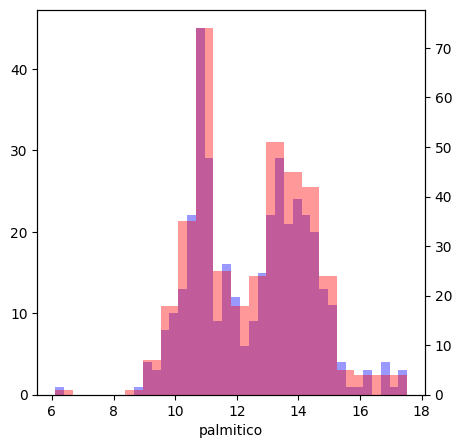

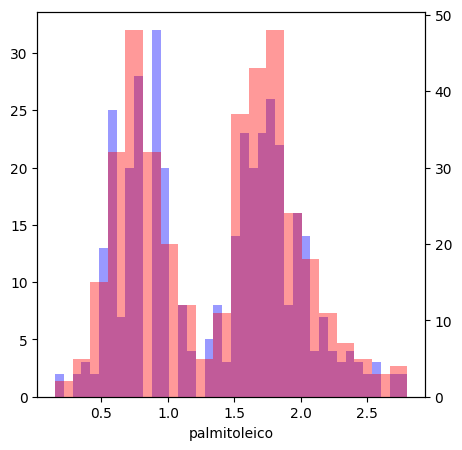

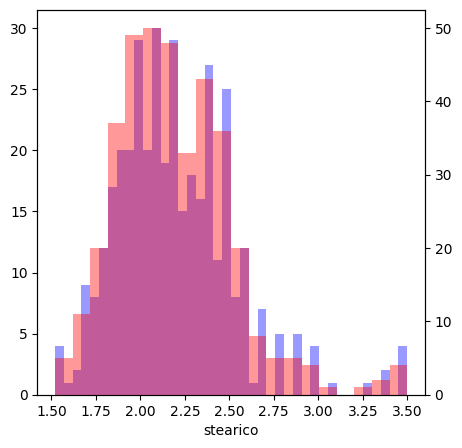

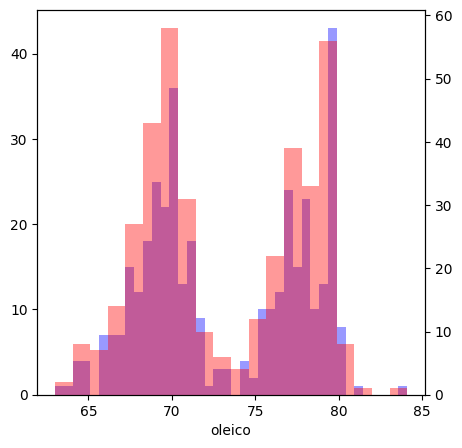

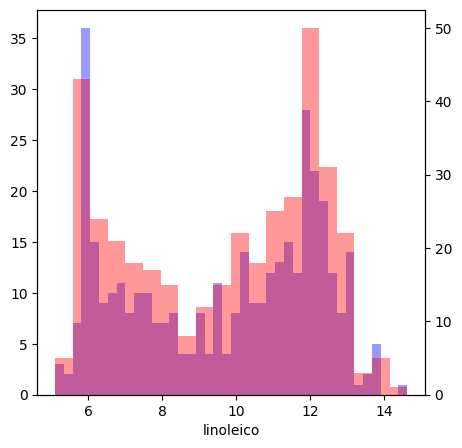

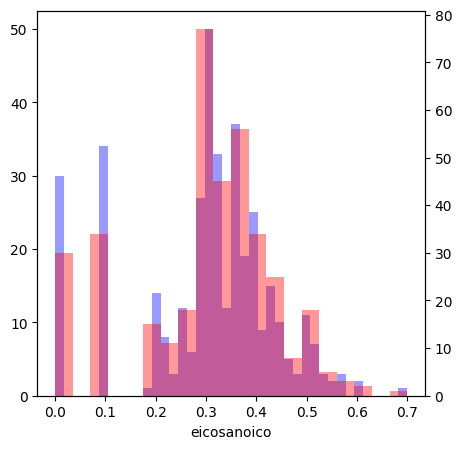

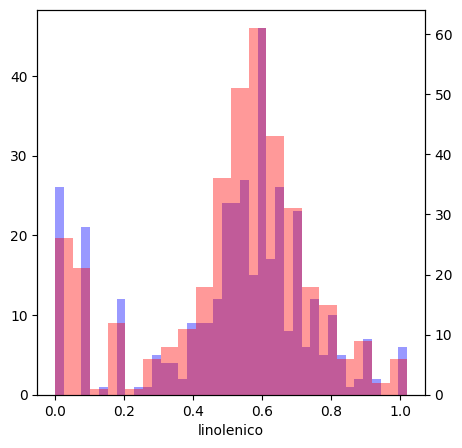

In [10]:
for feature in features_columns:
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.distplot(olive_oil[feature], color='b', bins=number_of_bins, hist_kws={'alpha': 0.4}, ax=ax, kde=False)
    ax2 = ax.twinx()
    sns.distplot(olive_oil[feature], color='r', bins=20, hist_kws={'alpha': 0.4}, ax=ax2, kde=False)
    plt.show()

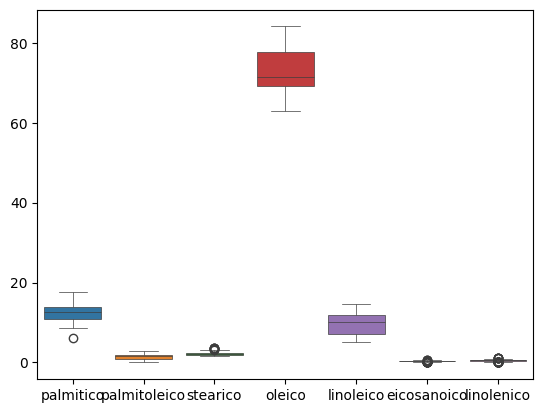

In [11]:
# Box plots 
sns.boxplot(data=olive_oil, linewidth=0.5)
plt.show()

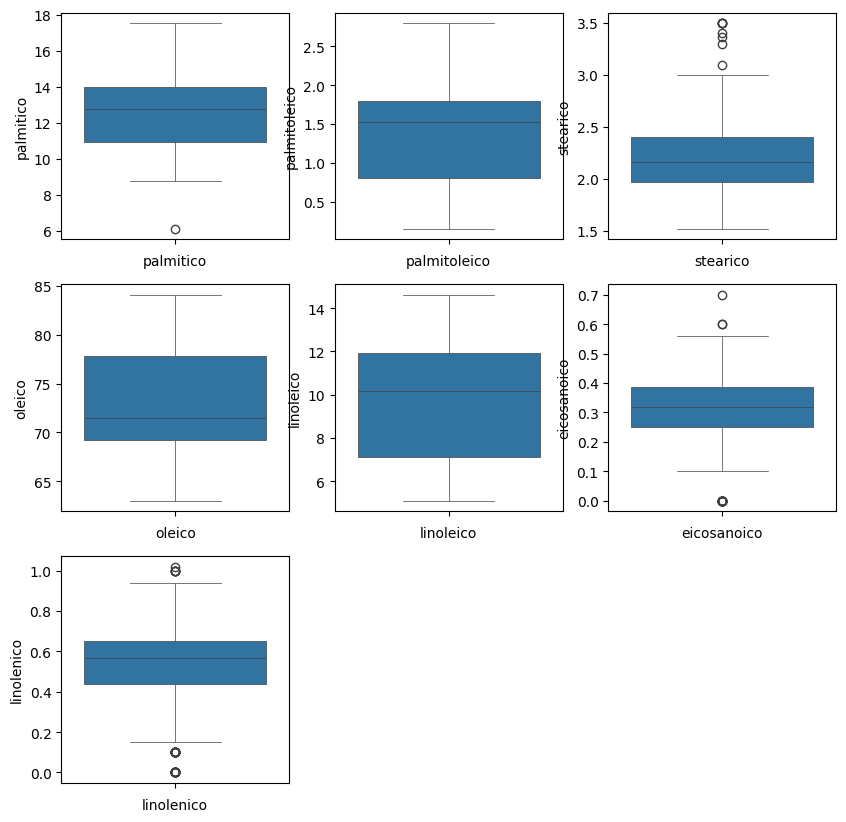

In [12]:
f, axes = plt.subplots(3, 3, figsize=(10, 10))
for ax, feature in zip(axes.flat, features_columns):
    sns.boxplot(data=olive_oil[feature], ax=ax, linewidth=0.5).set(xlabel=feature)
f.delaxes(axes[2, 1])  # The indexing is zero-based here
f.delaxes(axes[2, 2])  # The indexing is zero-based here
plt.show()

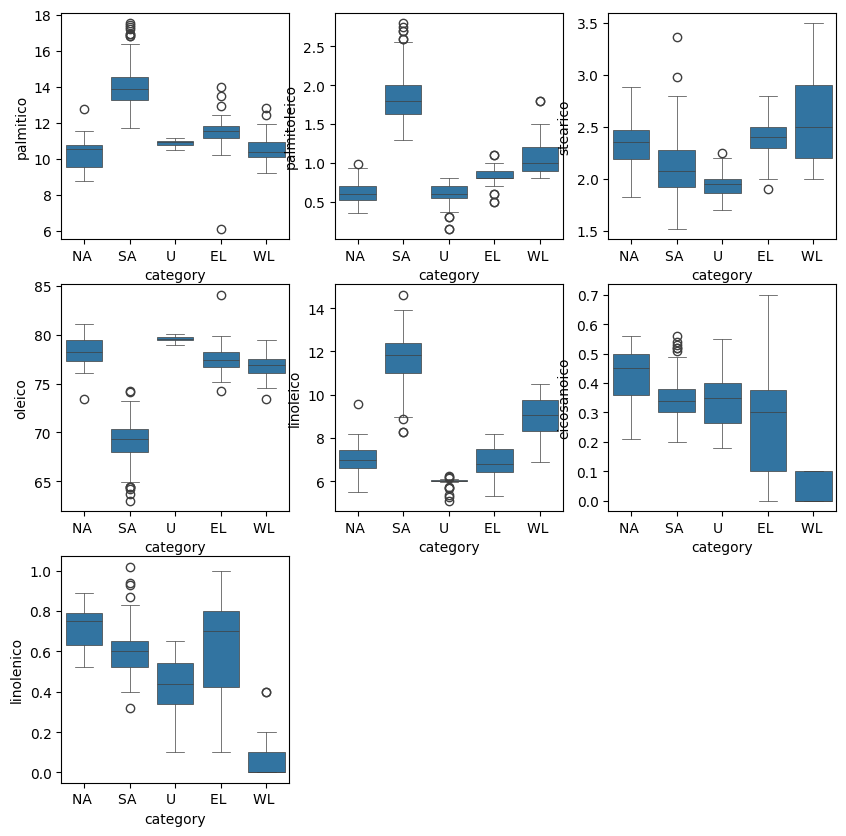

In [13]:
f, axes = plt.subplots(3, 3, figsize=(10, 10))
for ax, feature in zip(axes.flat, features_columns):
    sns.boxplot(x="category", y=feature, data=olive_oil, ax=ax, linewidth=0.5)
f.delaxes(axes[2, 1])  # The indexing is zero-based here
f.delaxes(axes[2, 2])  # The indexing is zero-based here
plt.show()

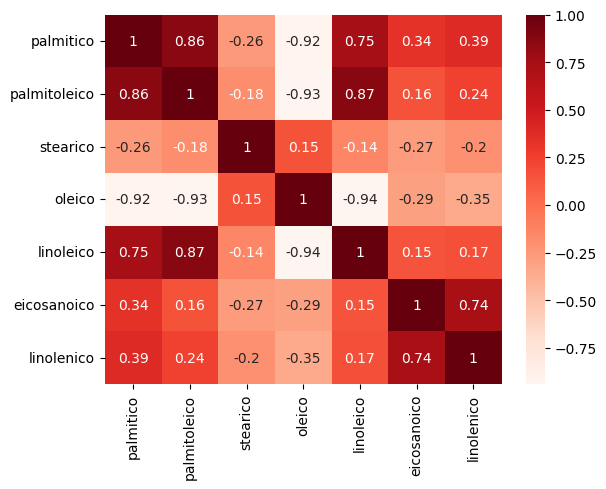

In [14]:
# Features vs Features
corr = olive_oil.drop("category", axis=1).corr()
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    cmap="Reds",
)
plt.show()

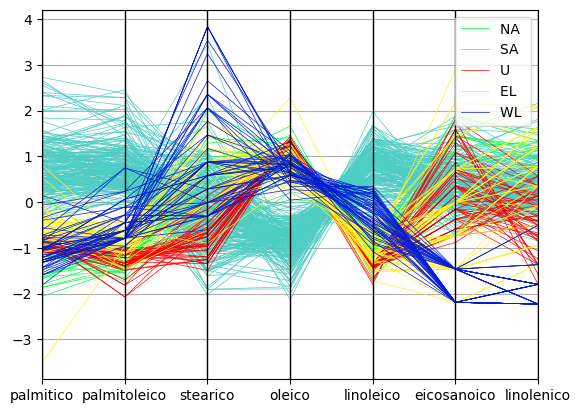

In [15]:
# Parallel Coordinates 
standardize_values = olive_oil
standardize_values[features_columns] = StandardScaler().fit_transform(
    standardize_values[features_columns]
)
parallel_coordinates(
    standardize_values,
    "category",
    lw=0.5,
    color=("#00ff45", "#4ECDC4", "#ff0000", "#fff121", "#001dd5"),
)
plt.show()

In [16]:
# Classification test with RandomForestClassifier - Feature selection
print(olive_oil.iloc[:, 1:])
# Isolate Data, class labels and column values
X = olive_oil.iloc[:, 1:]
Y = olive_oil.iloc[:, 0]
names = olive_oil.columns.values

     palmitico  palmitoleico  stearico    oleico  linoleico  eicosanoico  \
0    -0.969005     -1.047923  0.166615  1.056185  -1.150976     0.428280   
1    -0.898081     -1.082105  0.107354  0.817145  -0.719163     0.064394   
2    -1.863745     -1.406835  0.759233  1.664260  -1.638252     0.064394   
3    -1.563679     -1.355561  0.581447  1.326672  -1.360941     1.447160   
4    -1.099943     -1.184651  1.144434  0.947148  -1.150976     1.447160   
..         ...           ...       ...       ...        ...          ...   
377   0.149418     -0.449736  2.062991  0.357942  -0.683509    -1.463926   
378  -1.050841     -0.620647  1.470373  0.882147  -0.604277    -1.463926   
379  -1.323627     -0.791557 -0.307478  0.840210   0.029577    -2.191697   
380  -1.432742     -0.278826  0.877756  0.903115  -0.366582    -1.463926   
381  -1.596413     -0.962467  0.581447  1.322479  -0.881588    -1.463926   

     linolenico  
0      0.353954  
1      0.396988  
2      0.483054  
3      1.128554

In [17]:
# Build the model
rfc = RandomForestClassifier()
# Fit the model
rfc.fit(X, Y)


RandomForestClassifier()

In [18]:
# Print the results
print("Features sorted by their score:")
print(
    sorted(
        zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True
    )
)


Features sorted by their score:
[(0.218, 'stearico'), (0.2051, 'palmitico'), (0.1673, 'oleico'), (0.152, 'category'), (0.1085, 'eicosanoico'), (0.0916, 'linoleico'), (0.0574, 'palmitoleico')]


In [19]:
# Isolate feature importance
importance = rfc.feature_importances_
# Sort the feature importance
sorted_importances = np.argsort(importance)
# Insert padding
padding = np.arange(len(names) - 1) + 0.5

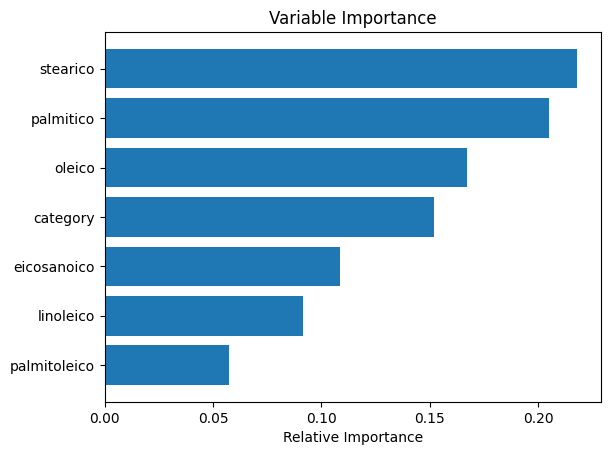

In [20]:
# Plot the data
plt.barh(padding, importance[sorted_importances], align="center")
# Customize the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
# Show the plot
plt.show()
